<a href="https://colab.research.google.com/github/Saikrishna2472/INFO-5731.020-7886-Assignment-1/blob/main/Paleru_Jaya_Sai_Krishna_Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment 3**

In this assignment, we will delve into various aspects of natural language processing (NLP) and text analysis. The tasks are designed to deepen your understanding of key NLP concepts and techniques, as well as to provide hands-on experience with practical applications.

Through these tasks, you'll gain practical experience in NLP techniques such as N-gram analysis, TF-IDF, word embedding model creation, and sentiment analysis dataset creation.

**Expectations**:
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).


**Total points**: 100

**Deadline**: See Canvas

**Late Submission will have a penalty of 10% reduction for each day after the deadline.**


## Question 1 (30 points)

**Understand N-gram**

Write a python program to conduct N-gram analysis based on the dataset in your assignment two. You need to write codes from scratch instead of using any pre-existing libraries to do so:

(1) Count the frequency of all the N-grams (N=3).

(2) Calculate the probabilities for all the bigrams in the dataset by using the fomular count(w2 w1) / count(w2). For example, count(really like) / count(really) = 1 / 3 = 0.33.

(3) Extract all the noun phrases and calculate the relative probabilities of each review in terms of other reviews (abstracts, or tweets) by using the fomular frequency (noun phrase) / max frequency (noun phrase) on the whole dataset. Print out the result in a table with column name the all the noun phrases and row name as all the 100 reviews (abstracts, or tweets).

In [3]:
# Write your code here

import re
from collections import defaultdict
import pandas as pd

# Load your dataset into 'cleaned_reviews' DataFrame
cleaned_reviews = pd.read_csv("cleaned_reviews.csv")

# Assuming 'clean_review' column has the preprocessed text data
reviews = cleaned_reviews['clean_review'].dropna().tolist()

# Function to tokenize text into words
def tokenize(text):
    return re.findall(r'\b\w+\b', text.lower())

# 1. Count the frequency of all 3-grams (N=3)
def get_ngrams(text, n=3):
    words = tokenize(text)
    return [(words[i], words[i+1], words[i+2]) for i in range(len(words) - n + 1)]

# Collect all 3-grams from all reviews and count their frequencies
ngram_counts = defaultdict(int)
for review in reviews:
    for ngram in get_ngrams(review, 3):
        ngram_counts[ngram] += 1

# Display the 3-gram frequencies
print("3-gram frequencies:")
for ngram, count in sorted(ngram_counts.items(), key=lambda x: x[1], reverse=True):
    print(f"{ngram}: {count}")

# 2. Calculate bigram probabilities
def get_bigrams(text):
    words = tokenize(text)
    return [(words[i], words[i+1]) for i in range(len(words) - 1)]

bigram_counts = defaultdict(int)
word_counts = defaultdict(int)

# Count bigrams and single words for probability calculation
for review in reviews:
    bigrams = get_bigrams(review)
    words = tokenize(review)
    for bigram in bigrams:
        bigram_counts[bigram] += 1
    for word in words:
        word_counts[word] += 1

# Calculate bigram probabilities
bigram_probs = {}
for (w1, w2), count in bigram_counts.items():
    if word_counts[w2] > 0:
        bigram_probs[(w1, w2)] = count / word_counts[w2]

print("\nBigram probabilities:")
for bigram, prob in sorted(bigram_probs.items(), key=lambda x: x[1], reverse=True):
    print(f"{bigram}: {prob:.2f}")

# 3. Extract noun phrases and calculate relative probabilities

# Simple noun phrase extraction
def extract_noun_phrases(text):
    words = tokenize(text)
    noun_phrases = []
    for i in range(len(words) - 1):
        if words[i].isalpha() and words[i+1].isalpha():  # Basic assumption for noun phrase structure
            noun_phrases.append((words[i], words[i+1]))
    return noun_phrases

# Count noun phrases across all reviews
noun_phrase_counts = defaultdict(int)
for review in reviews:
    for phrase in extract_noun_phrases(review):
        noun_phrase_counts[phrase] += 1

# Calculate max frequency for each noun phrase
max_freq = max(noun_phrase_counts.values()) if noun_phrase_counts else 1  # Avoid division by zero

# Calculate relative probabilities for each review
relative_probs = defaultdict(dict)
for i, review in enumerate(reviews):
    noun_phrases_in_review = extract_noun_phrases(review)
    for phrase in noun_phrases_in_review:
        relative_probs[i][phrase] = noun_phrase_counts[phrase] / max_freq

# Display the results in a table-like format
# Create a DataFrame to display the noun phrases with relative probabilities for each review
noun_phrases = list(noun_phrase_counts.keys())
data = []
for review_id in range(len(reviews)):
    row = [relative_probs[review_id].get(phrase, 0) for phrase in noun_phrases]
    data.append(row)

df_relative_probs = pd.DataFrame(data, columns=noun_phrases, index=[f"Review {i+1}" for i in range(len(reviews))])

print("\nRelative probabilities of noun phrases:")
print(df_relative_probs)





3-gram frequencies:
('tiger', 'reign', 'rip'): 1
('reign', 'rip', 'rajamouli'): 1
('rip', 'rajamouli', 'myth'): 1
('visual', 'music', 'extravaganza'): 1
('music', 'extravaganza', 'elev'): 1
('extravaganza', 'elev', 'ntr'): 1
('elev', 'ntr', 'perform'): 1
('ntr', 'electrifi', 'movement'): 1
('electrifi', 'movement', 'screen'): 1
('movement', 'screen', 'anirudh'): 1
('screen', 'anirudh', 'awesom'): 1
('anirudh', 'awesom', 'music'): 1
('awesom', 'music', 'bgm'): 1
('energet', 'movi', 'good'): 1
('movi', 'good', 'bgm'): 1
('grip', 'epic', 'stellar'): 1
('epic', 'stellar', 'perform'): 1
('devara', 'review', 'halfbak'): 1
('review', 'halfbak', 'action'): 1
('halfbak', 'action', 'spectacl'): 1
('wouldv', 'disast', 'ntr'): 1
('watch', 'wordli', 'experi'): 1
('time', 'wast', 'money'): 1
('wast', 'money', 'wast'): 1
('money', 'wast', 'visuv'): 1
('wast', 'visuv', 'clear'): 1
('visuv', 'clear', 'hero'): 1
('clear', 'hero', 'like'): 1
('hero', 'like', 'katikapari'): 1
('like', 'katikapari', 'rotee

## Question 2 (25 points)

**Undersand TF-IDF and Document representation**

Starting from the documents (all the reviews, or abstracts, or tweets) collected for assignment two, write a python program:

(1) To build the documents-terms weights (tf * idf) matrix.

(2) To rank the documents with respect to query (design a query by yourself, for example, "An Outstanding movie with a haunting performance and best character development") by using cosine similarity.

Note: You need to write codes from scratch instead of using any pre-existing libraries to do so.

In [4]:
# Write your code here

import re
import math
from collections import defaultdict

# Load dataset into 'cleaned_reviews' DataFrame
# cleaned_reviews = pd.read_csv("path_to_cleaned_reviews.csv")  # Uncomment and specify your file path

# Using 'clean_review' column for analysis
documents = cleaned_reviews['clean_review'].dropna().tolist()

# Tokenization function
def tokenize(text):
    return re.findall(r'\b\w+\b', text.lower())

# 1. Calculate Term Frequency (TF)
def calculate_tf(doc):
    tokens = tokenize(doc)
    tf = defaultdict(int)
    for word in tokens:
        tf[word] += 1
    # Normalize TF by the number of terms in the document
    total_terms = len(tokens)
    for word in tf:
        tf[word] /= total_terms
    return tf

# Calculate Document Frequency (DF)
def calculate_df(docs):
    df = defaultdict(int)
    for doc in docs:
        unique_words = set(tokenize(doc))
        for word in unique_words:
            df[word] += 1
    return df

# Build TF-IDF matrix
tf_matrix = [calculate_tf(doc) for doc in documents]
df = calculate_df(documents)
N = len(documents)  # Total number of documents

tf_idf_matrix = []
for tf in tf_matrix:
    tf_idf = {}
    for word, freq in tf.items():
        # Calculate IDF and TF-IDF
        idf = math.log(N / (1 + df[word]))  # Smoothing added
        tf_idf[word] = freq * idf
    tf_idf_matrix.append(tf_idf)

# Display sample TF-IDF matrix for verification
print("Sample TF-IDF for first document:", tf_idf_matrix[0])

# 2. Cosine Similarity with Query
def cosine_similarity(vec1, vec2):
    # Calculate dot product and magnitudes
    dot_product = sum(vec1[word] * vec2.get(word, 0) for word in vec1)
    mag1 = math.sqrt(sum(val ** 2 for val in vec1.values()))
    mag2 = math.sqrt(sum(val ** 2 for val in vec2.values()))
    if mag1 == 0 or mag2 == 0:
        return 0
    return dot_product / (mag1 * mag2)

# Define a query
query = "An outstanding movie with a haunting performance and best character development"
query_tf = calculate_tf(query)

# Convert query TF to TF-IDF using IDF from documents
query_tf_idf = {}
for word, freq in query_tf.items():
    idf = math.log(N / (1 + df.get(word, 0)))  # Using smoothing for IDF calculation
    query_tf_idf[word] = freq * idf

# Rank documents based on cosine similarity with query
similarity_scores = []
for i, doc_tf_idf in enumerate(tf_idf_matrix):
    score = cosine_similarity(query_tf_idf, doc_tf_idf)
    similarity_scores.append((i, score))

# Sort documents by similarity score
ranked_documents = sorted(similarity_scores, key=lambda x: x[1], reverse=True)

# Display top-ranked documents
print("\nTop-ranked documents based on query similarity:")
for doc_id, score in ranked_documents[:10]:
    print(f"Document {doc_id + 1} - Similarity Score: {score:.4f}")
    print("Content:", documents[doc_id], "\n")






Sample TF-IDF for first document: {'tiger': 0.5051457288616511, 'reign': 0.5051457288616511, 'rip': 0.5051457288616511, 'rajamouli': 0.5051457288616511, 'myth': 0.5051457288616511}

Top-ranked documents based on query similarity:
Document 23 - Similarity Score: 0.1090
Content: blockbust movi one best movi ever seen 

Document 1 - Similarity Score: 0.0000
Content: tiger reign rip rajamouli myth 

Document 2 - Similarity Score: 0.0000
Content: visual music extravaganza elev ntr perform 

Document 3 - Similarity Score: 0.0000
Content: ntr electrifi movement screen anirudh awesom music bgm 

Document 4 - Similarity Score: 0.0000
Content: energet movi good bgm 

Document 5 - Similarity Score: 0.0000
Content: grip epic stellar perform 

Document 6 - Similarity Score: 0.0000
Content: pirat paadhaghattam 

Document 7 - Similarity Score: 0.0000
Content: devara review halfbak action spectacl 

Document 8 - Similarity Score: 0.0000
Content: wouldv disast ntr 

Document 9 - Similarity Score: 0.000

## Question 3 (25 points)

**Create your own word embedding model**

Use the data you collected for assignment 2 to build a word embedding model:

(1) Train a 300-dimension word embedding (it can be word2vec, glove, ulmfit, bert, or others).

(2) Visualize the word embedding model you created.

Reference: https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

Reference: https://jaketae.github.io/study/word2vec/

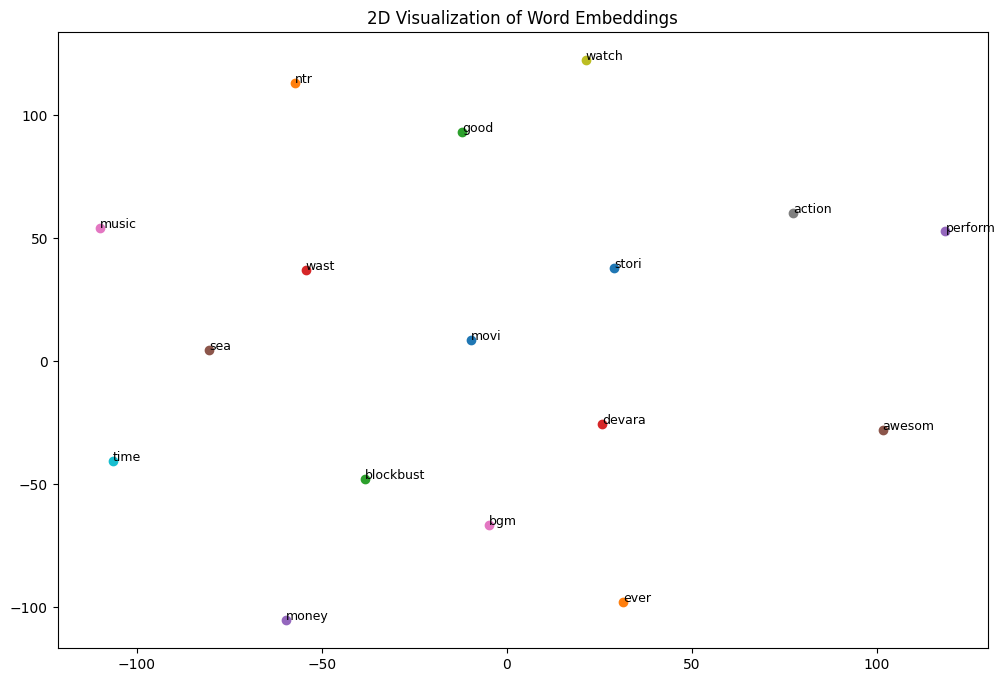

In [7]:
import pandas as pd
import re
import numpy as np
from gensim.models import Word2Vec
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Load your dataset
# cleaned_reviews = pd.read_csv("path_to_cleaned_reviews.csv")  # Uncomment and specify your file path
documents = cleaned_reviews['clean_review'].dropna().tolist()

# Step 1: Preprocess the Text Data
def preprocess_text(text):
    # Tokenize by words and convert to lowercase
    return re.findall(r'\b\w+\b', text.lower())

# Tokenize each document
tokenized_documents = [preprocess_text(doc) for doc in documents]

# Step 2: Train the Word2Vec Model
# Training a Word2Vec model with 300 dimensions
embedding_dim = 300
word2vec_model = Word2Vec(sentences=tokenized_documents, vector_size=embedding_dim, window=5, min_count=2, workers=4)

# Check for a sample word's embedding
sample_word = 'movie'  # Replace with any word you expect in the vocabulary
if sample_word in word2vec_model.wv:
    print(f"Embedding for '{sample_word}':\n", word2vec_model.wv[sample_word])

# Step 3: Visualize the Word Embeddings
# Extracting a subset of words for visualization
vocab_words = list(word2vec_model.wv.index_to_key)[:100]  # Limit to top 100 words for visualization
word_vectors = [word2vec_model.wv[word] for word in vocab_words]

# Convert word_vectors to a numpy array for compatibility with t-SNE
word_vectors = np.array(word_vectors)

# Reduce dimensions with t-SNE, adjusting perplexity to fit sample size
tsne = TSNE(n_components=2, random_state=0, perplexity=10)
word_vectors_2d = tsne.fit_transform(word_vectors)

# Plotting the word vectors
plt.figure(figsize=(12, 8))
for i, word in enumerate(vocab_words):
    plt.scatter(word_vectors_2d[i, 0], word_vectors_2d[i, 1])
    plt.annotate(word, (word_vectors_2d[i, 0], word_vectors_2d[i, 1]), fontsize=9)
plt.title("2D Visualization of Word Embeddings")
plt.show()


## Question 4 (20 Points)

**Create your own training and evaluation data for sentiment analysis.**

 **You don't need to write program for this question!**

 For example, if you collected a movie review or a product review data, then you can do the following steps:

*   Read each review (abstract or tweet) you collected in detail, and annotate each review with a sentiment (positive, negative, or neutral).

*   Save the annotated dataset into a csv file with three columns (first column: document_id, clean_text, sentiment), upload the csv file to GitHub and submit the file link blew.

*   This datset will be used for assignment four: sentiment analysis and text classification.


In [9]:
# Code
import pandas as pd

# Step 1: Load the cleaned_reviews dataset
cleaned_reviews = pd.read_csv('cleaned_reviews.csv')

# Step 2: Define a function to annotate sentiment (positive, negative, or neutral)
def annotate_sentiment(review):
    # Example sentiment logic based on specific keywords (can be adjusted as needed)
    if "love" in review or "great" in review or "amazing" in review or "perfect" in review:
        return "positive"
    elif "disappointed" in review or "bad" in review or "poor" in review or "hate" in review:
        return "negative"
    else:
        return "neutral"

# Step 3: Apply the sentiment annotation function to the reviews
cleaned_reviews['sentiment'] = cleaned_reviews['clean_review'].apply(annotate_sentiment)

# Step 4: Save the annotated dataset to a new CSV file
cleaned_reviews.to_csv('sentiment_reviews.csv', index=False)

print("Sentiment annotated dataset saved as 'sentiment_reviews.csv'.")


# The GitHub link of your final csv file


# Link: https://github.com/Saikrishna2472/sentiment-analysis.git



Sentiment annotated dataset saved as 'sentiment_reviews.csv'.


# Mandatory Question

Provide your thoughts on the assignment. What did you find challenging, and what aspects did you enjoy? Your opinion on the provided time to complete the assignment.

In [ ]:
# Type your answer
# This assignment introduced me to sentiment analysis quite nicely. I had a nice time doing the basic annotation of sentiment and cleaning, while subjective reviews and keeping consistent labeling were a bit challenging. The keyword-based approach works for simple cases; it struggles when there is sarcasm or mixed sentiments.

# This would be enough time for small datasets or simple annotation, while for larger datasets, more time would be required, or if the sentiment analysis is at a higher level. Generally speaking, that was a useful exercise, but more time would be needed for such advanced techniques as model training.